In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

file_path = "/train.csv"
df = pd.read_csv(file_path)
df.head()
print(f"Shape: {df.shape}\n")


Shape: (58592, 44)



In [2]:
# basic information
print(f"Columns: {df.columns}\n")
print(f"Data types: \n{df.dtypes}\n")
print(f"Missing values: \n{df.isnull().sum()}\n")
print(f"Unique values: \n{df.nunique()}\n")

Columns: Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

Data types: 
policy_id                            object
policy_tenure                       float64
age_of_car              

In [5]:
#Missing Value Analysis
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing if not missing.empty else "No missing values found.")

No missing values found.


In [4]:
# Fill missing numeric values with median, categorical with mode
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64', 'float64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
print("\n✅ Missing values handled.\n")


✅ Missing values handled.



In [3]:
# ------------------------------------------
# 4. Duplicate Handling
# ------------------------------------------
duplicates = df.duplicated().sum()
print(f"🔹 Duplicate rows found: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"✅ Duplicates removed. New shape: {df.shape}\n")

🔹 Duplicate rows found: 0


In [4]:
# ------------------------------------------
# 5. Data Type Conversion
# ------------------------------------------
for col in df.columns:
    if 'date' in col.lower():
        try:
            df[col] = pd.to_datetime(df[col])
            print(f"Converted {col} to datetime.")
        except:
            pass

In [5]:
# ------------------------------------------
# 6. Outlier Detection and Treatment (IQR)
# ------------------------------------------
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    if outliers > 0:
        df[col] = np.where(df[col] < lower, lower,
                           np.where(df[col] > upper, upper, df[col]))
        print(f"Outliers capped in column: {col}")

print("\n✅ Outlier treatment completed.\n")

Outliers capped in column: age_of_car
Outliers capped in column: age_of_policyholder
Outliers capped in column: population_density
Outliers capped in column: gear_box
Outliers capped in column: is_claim

✅ Outlier treatment completed.



📊 Generating visualizations...


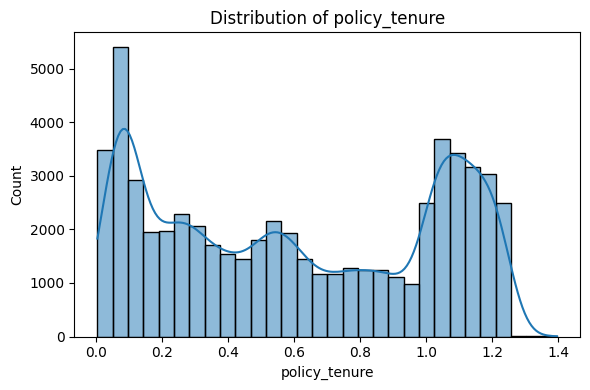

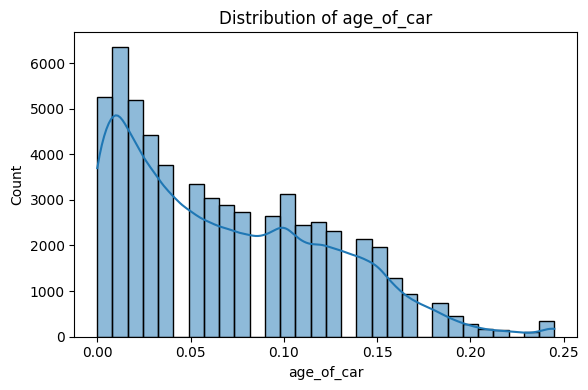

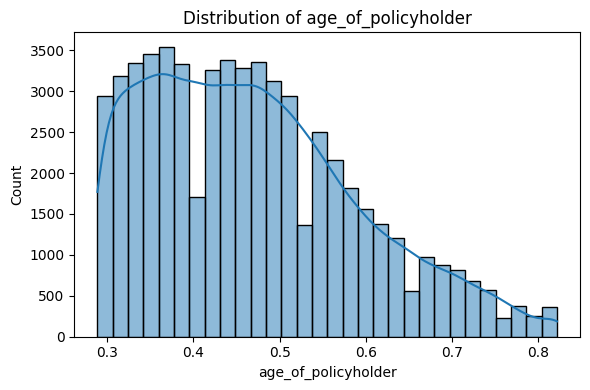

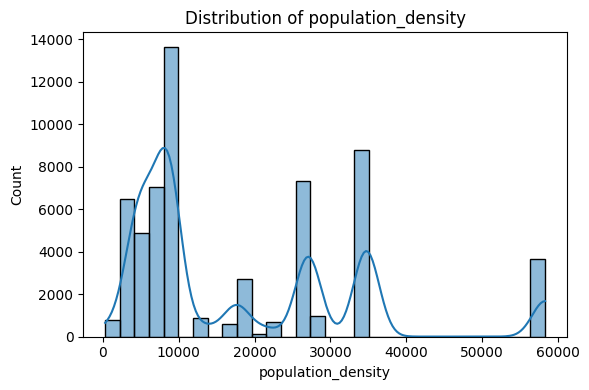

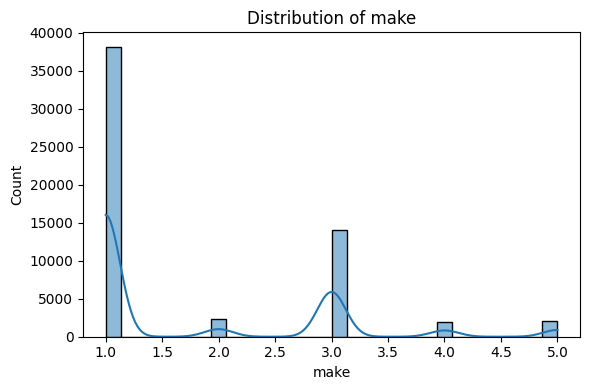

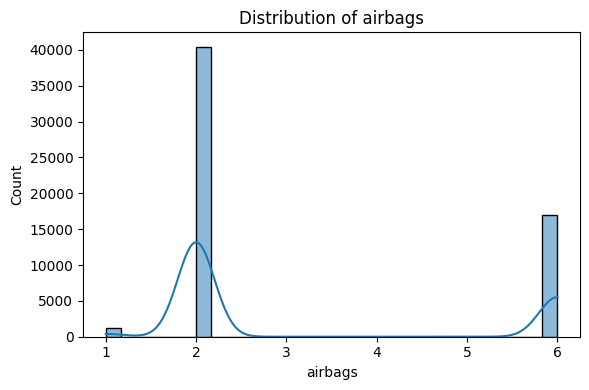

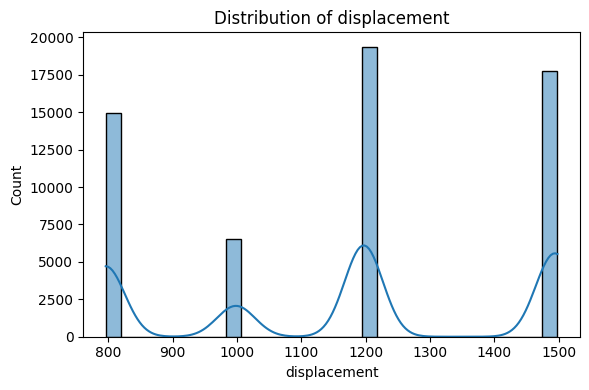

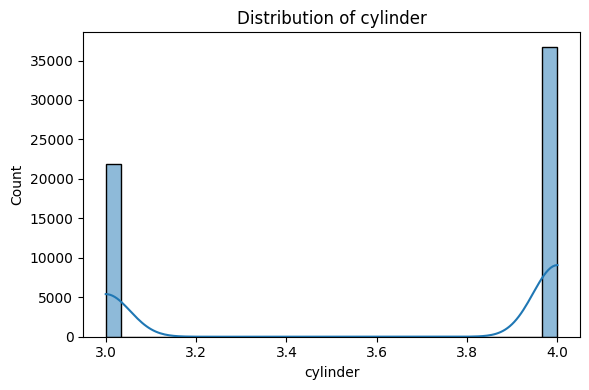

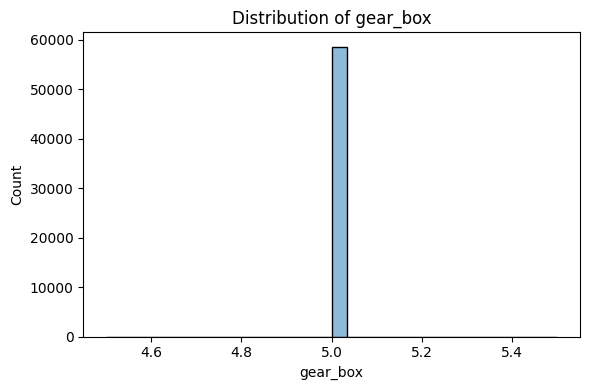

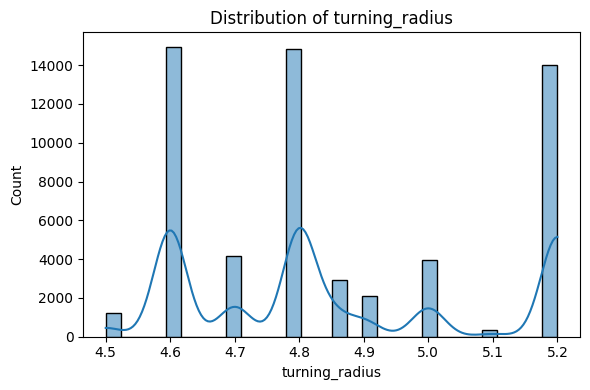

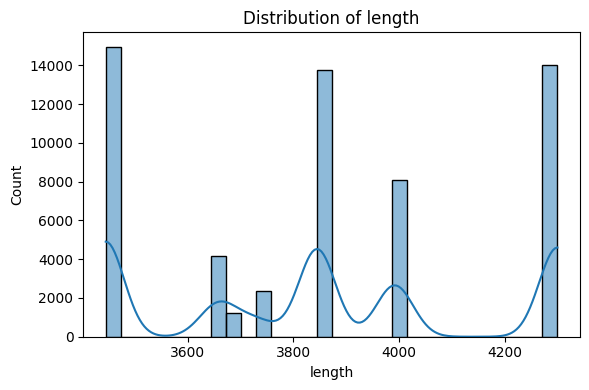

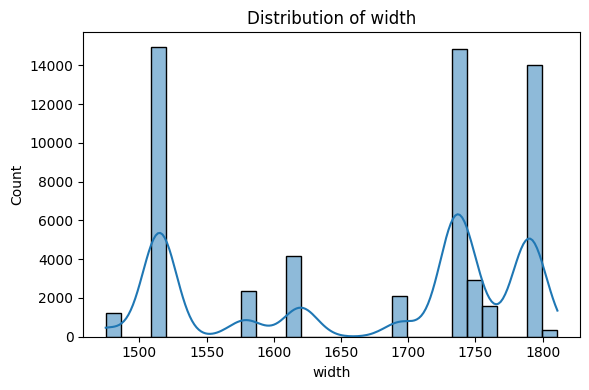

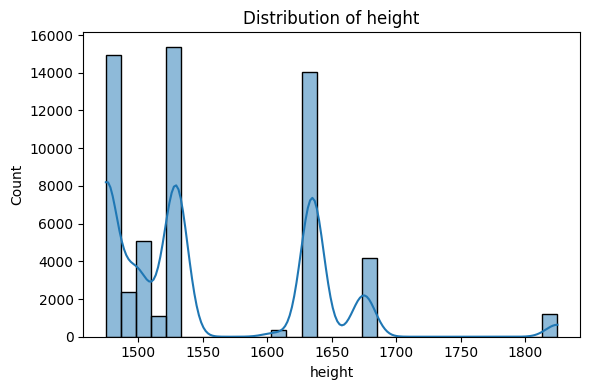

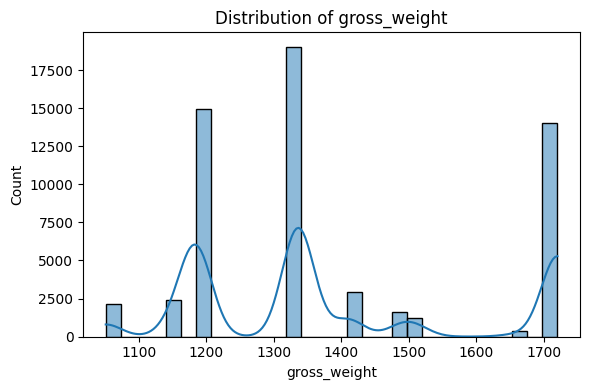

KeyboardInterrupt: 

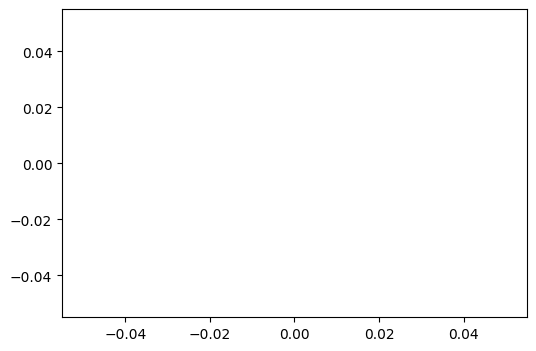

In [6]:
# ------------------------------------------
# 7. EDA Visualizations
# ------------------------------------------

print("📊 Generating visualizations...")

# Distribution plots for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

In [ ]:
# Boxplots for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

# Correlation heatmap
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()

# Categorical distribution plots
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    if df[col].nunique() < 20:
        plt.figure(figsize=(8, 4))
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f"Count Plot of {col}")
        plt.tight_layout()
        plt.show()

# ------------------------------------------
# 8. Summary
# ------------------------------------------
print("\n✅ EDA and Data Cleaning completed successfully!")
print(f"Final dataset shape: {df.shape}")
print("Cleaned data sample:")
print(df.head())

# Save cleaned data
output_file = "/test_cleaned.csv"
df.to_csv(output_file, index=False)
print(f"\n💾 Cleaned dataset saved as: {output_file}")

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
# Identify categorical columns (excluding IDs or unique columns)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
if 'policy_id' in categorical_cols:
    categorical_cols.remove('policy_id')  # skip unique identifiers
print("Categorical Columns to Encode:", categorical_cols)

Categorical Columns to Encode: ['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


In [14]:
# Apply Label Encoding for each categorical column
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

# Save the encoded dataset (compact version)
output_file = "/train_label_encoded.csv"
df.to_csv(output_file, index=False)
print(f"\n✅ Encoded dataset saved as: {output_file}")


✅ Encoded dataset saved as: /train_label_encoded.csv


In [15]:
# Normalize/scale numerical features
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns:", numeric_cols)


Numerical Columns: ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density', 'make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim']


In [16]:
# Initialize scaler
scaler = MinMaxScaler()

# Apply scaling only to numerical columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Save scaled dataset
output_file = "/train_scaled.csv"
df.to_csv(output_file, index=False)
print(f"\n✅ Scaled dataset saved as: {output_file}")


✅ Scaled dataset saved as: /train_scaled.csv


In [17]:
from sklearn.model_selection import train_test_split
# Load the processed dataset (after encoding/scaling)
file_path = "/train_label_encoded.csv"
df = pd.read_csv(file_path)
# Define features (X) and target (y)
target_column = "is_claim"
X = df.drop(columns=[target_column])
y = df[target_column]

# Perform 80/20 stratified split to preserve class balance
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Save to new CSVs
X_train.to_csv("/train_features.csv", index=False)
X_val.to_csv("/validation_features.csv", index=False)
y_train.to_csv("/train_target.csv", index=False)
y_val.to_csv("/validation_target.csv", index=False)

print("✅ Split complete!")
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Class distribution:\n{y.value_counts(normalize=True)}")

✅ Split complete!
Training set shape: (46873, 43)
Validation set shape: (11719, 43)
Class distribution:
is_claim
0.0    1.0
Name: proportion, dtype: float64


In [ ]:
#Baseline Regression model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load dataset
file_path = "/train_features.csv"
df = pd.read_csv(file_path)

# Define features (X) and target (y)
#target_column = "is_claim"
#X = df.drop(columns=[target_column])
#y = df[target_column]

# Handle categorical features (get dummies for simplicity)
X = pd.get_dummies(X, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

# Evaluate model
print("Logistic Regression Baseline Model Results")
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))
print(f"\nROC-AUC Score: {roc_auc_score(y_val, y_prob):.4f}")